In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# Upload the dataset manually in Google Colab
uploaded = files.upload()

# Get the filename and read the CSV file into a pandas DataFrame
filename = list(uploaded.keys())[0]  # Extract the uploaded file name
# Explicitly specify the encoding as 'latin-1' (or another appropriate encoding)
# df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin-1')  # Read CSV with encoding handling
# The original file is an excel file, not a csv file. Use pd.read_excel() instead
df = pd.read_excel(io.BytesIO(uploaded[filename]))


# Display basic info and first few rows
print(df.info())
print(df.head())

Saving customer_data (1).xlsx to customer_data (1) (11).xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       200 non-null    object        
 1   Product_Category  200 non-null    object        
 2   Purchase_Amount   200 non-null    float64       
 3   Purchase_Date     200 non-null    datetime64[ns]
 4   Payment_Method    200 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 7.9+ KB
None
  Customer_ID Product_Category  Purchase_Amount Purchase_Date Payment_Method
0      CUST_1        Furniture           491.88    2024-01-01    Credit Card
1      CUST_2           Sports           205.42    2024-01-02    Credit Card
2      CUST_3          Grocery           410.05    2024-01-03    Net Banking
3      CUST_4           Sports           401.19    2024-01-04           C

In [24]:
# 1. Basic Probability Calculation
total_purchases = df.shape[0]
# Calculate probability for each product category
product_probabilities = df['Product_Category'].value_counts(normalize=True)

# Display the probabilities
print(product_probabilities)


Product_Category
Furniture      0.245
Electronics    0.215
Grocery        0.185
Sports         0.180
Clothing       0.175
Name: proportion, dtype: float64


In [25]:
# Calculate expected purchase amount for each product category
expected_purchase_per_category = df.groupby('Product_Category')['Purchase_Amount'].mean()

# Display the result
print(expected_purchase_per_category)


Product_Category
Clothing       240.891429
Electronics    241.172093
Furniture      295.207959
Grocery        258.642162
Sports         259.918056
Name: Purchase_Amount, dtype: float64


In [27]:
# 2. Expected Purchase Amount
expected_purchase_amount = df['Purchase_Amount'].mean()
print(f"Expected Purchase Amount: ${expected_purchase_amount:.2f}")



Expected Purchase Amount: $260.97


In [29]:
# 3. Joint Probability Calculation (Product & Payment Method)
joint_probability = pd.crosstab(df['Product_Category'], df['Payment_Method'], margins=True, margins_name="Total")
joint_probability_normalized = joint_probability.div(joint_probability.loc['Total'], axis=1)
print("Joint Probability Table:")
print(joint_probability)
print("\nNormalized Joint Probability Table:")
print(joint_probability_normalized)

Joint Probability Table:
Payment_Method    Cash  Credit Card  Debit Card  Net Banking  UPI  Total
Product_Category                                                        
Clothing             8            8           4            6    9     35
Electronics          4           12           7           10   10     43
Furniture            7           10          11           13    8     49
Grocery              8            5           7           11    6     37
Sports               6            8           5            7   10     36
Total               33           43          34           47   43    200

Normalized Joint Probability Table:
Payment_Method        Cash  Credit Card  Debit Card  Net Banking       UPI  \
Product_Category                                                             
Clothing          0.242424     0.186047    0.117647     0.127660  0.209302   
Electronics       0.121212     0.279070    0.205882     0.212766  0.232558   
Furniture         0.212121     0.232558   

In [30]:
# 4. Conditional Probability
conditional_probability = df[(df['Product_Category'] == 'Grocery') & (df['Payment_Method'] == 'Credit Card')].shape[0] / df[df['Product_Category'] == 'Grocery'].shape[0]
print(f"Conditional Probability: {conditional_probability:.2%}")

Conditional Probability: 13.51%


In [32]:

# 5. Trend Analysis
# a. Monthly Sales Trends
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Month'] = df['Purchase_Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Purchase_Amount'].sum()
print("Monthly Sales Trends:")
print(monthly_sales)



Monthly Sales Trends:
Month
2024-01    9108.31
2024-02    8462.05
2024-03    8793.05
2024-04    6008.09
2024-05    7653.56
2024-06    6340.43
2024-07    5828.11
Freq: M, Name: Purchase_Amount, dtype: float64


In [34]:
# 5. Trend Analysis
# b. Customer Retention Analysis
customer_retention = df['Customer_ID'].value_counts()
print("Customer Retention Analysis:")
print(customer_retention)

Customer Retention Analysis:
Customer_ID
CUST_1      1
CUST_138    1
CUST_128    1
CUST_129    1
CUST_130    1
           ..
CUST_70     1
CUST_71     1
CUST_72     1
CUST_73     1
CUST_200    1
Name: count, Length: 200, dtype: int64


In [35]:
# c. Spending Behavior Distribution
spending_distribution = df['Purchase_Amount'].describe()
print("Spending Behavior Distribution:")
print(spending_distribution)
# d. Outlier Detection in Spending
Q1 = df['Purchase_Amount'].quantile(0.25)
Q3 = df['Purchase_Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Purchase_Amount'] < (Q1 - 1.5 * IQR)) | (df['Purchase_Amount'] > (Q3 + 1.5 * IQR))]
print("Outlier Detection in Spending:")
print(outliers)

Spending Behavior Distribution:
count    200.000000
mean     260.968000
std      144.323237
min       12.540000
25%      137.832500
50%      257.265000
75%      384.685000
max      498.160000
Name: Purchase_Amount, dtype: float64
Outlier Detection in Spending:
Empty DataFrame
Columns: [Customer_ID, Product_Category, Purchase_Amount, Purchase_Date, Payment_Method, Month]
Index: []


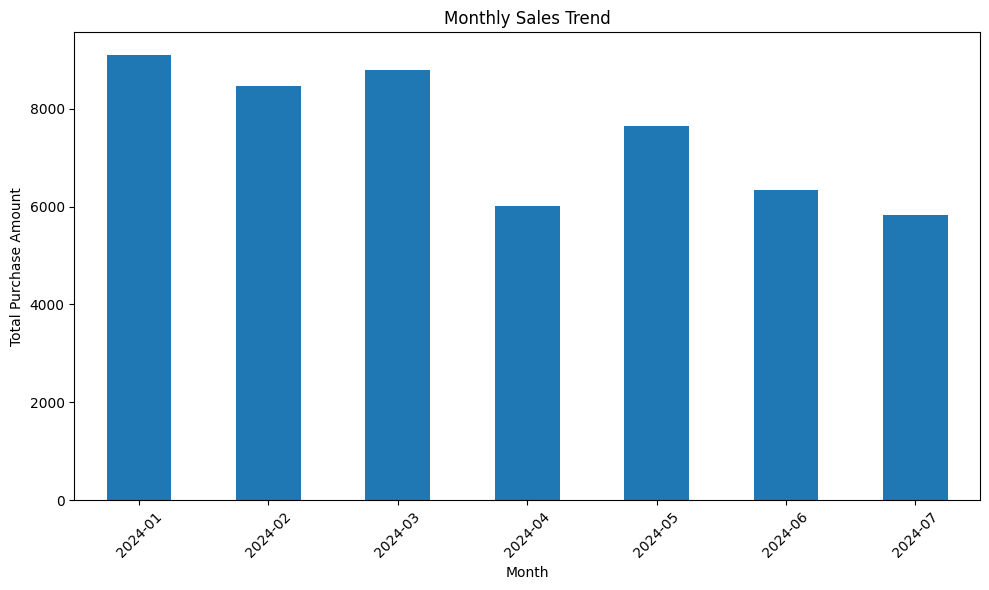

In [36]:
# 6. Trend Analysis & Plots
# a. Monthly Sales Trend (Bar Chart)
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

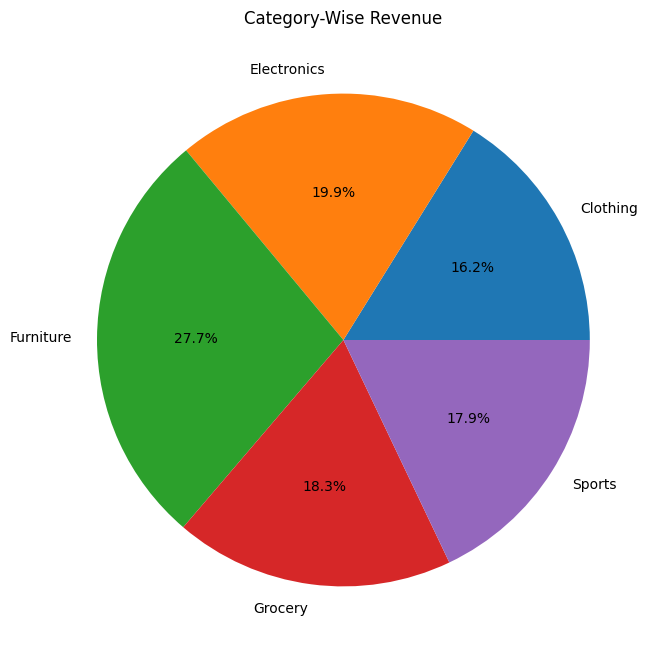

In [37]:
# b. Category-Wise Revenue (Pie Chart)
category_revenue = df.groupby('Product_Category')['Purchase_Amount'].sum()
plt.figure(figsize=(8, 8))
category_revenue.plot(kind='pie', autopct='%1.1f%%')
plt.title('Category-Wise Revenue')
plt.ylabel('')
plt.show()


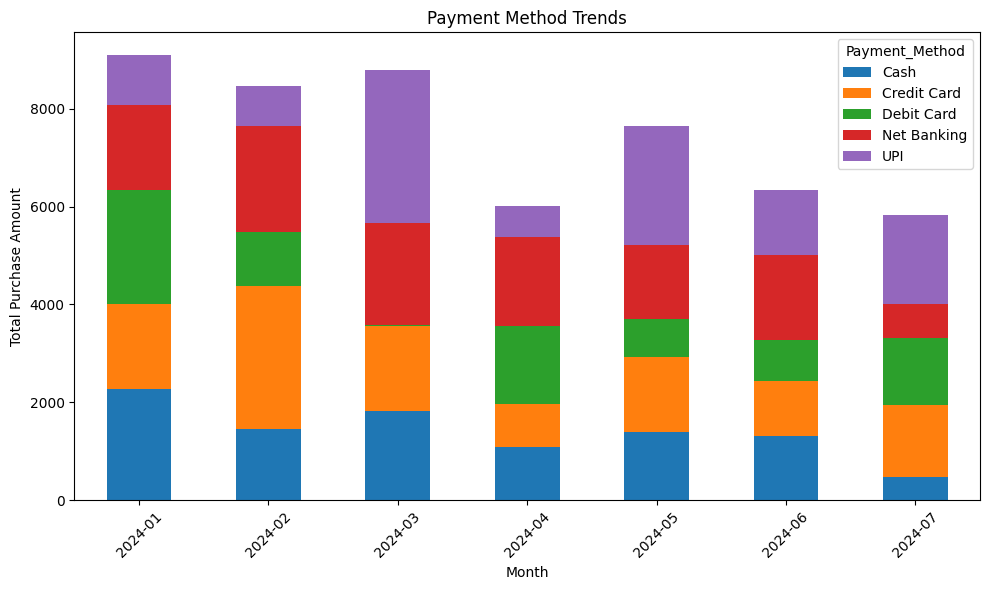

In [38]:
# c. Payment Method Trends (Stacked Bar Chart)
payment_method_trends = df.groupby(['Month', 'Payment_Method'])['Purchase_Amount'].sum().unstack()
payment_method_trends.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Payment Method Trends')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



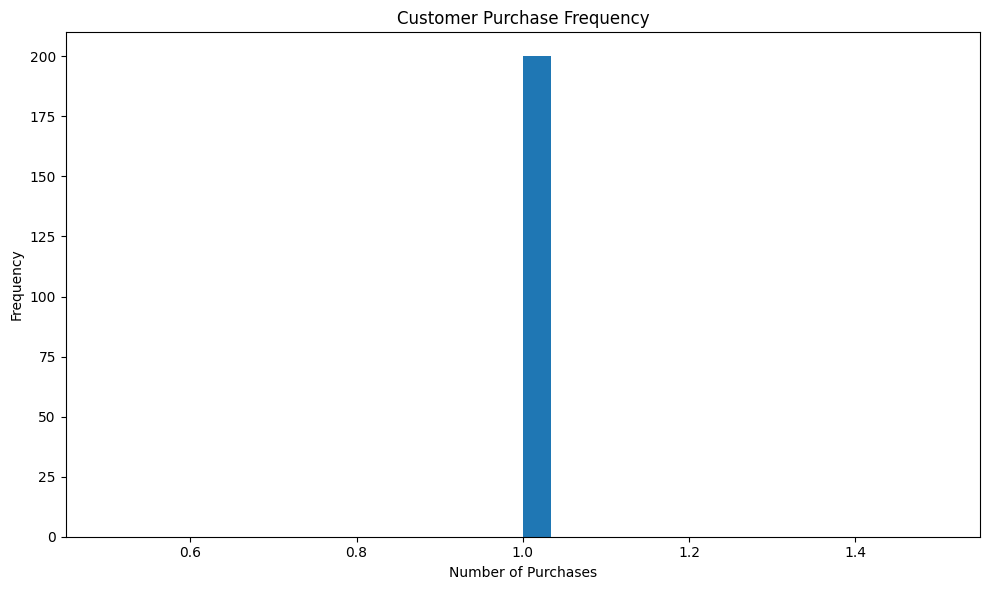

In [39]:
# d. Customer Purchase Frequency (Histogram)
plt.figure(figsize=(10, 6))
customer_retention.plot(kind='hist', bins=30)
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

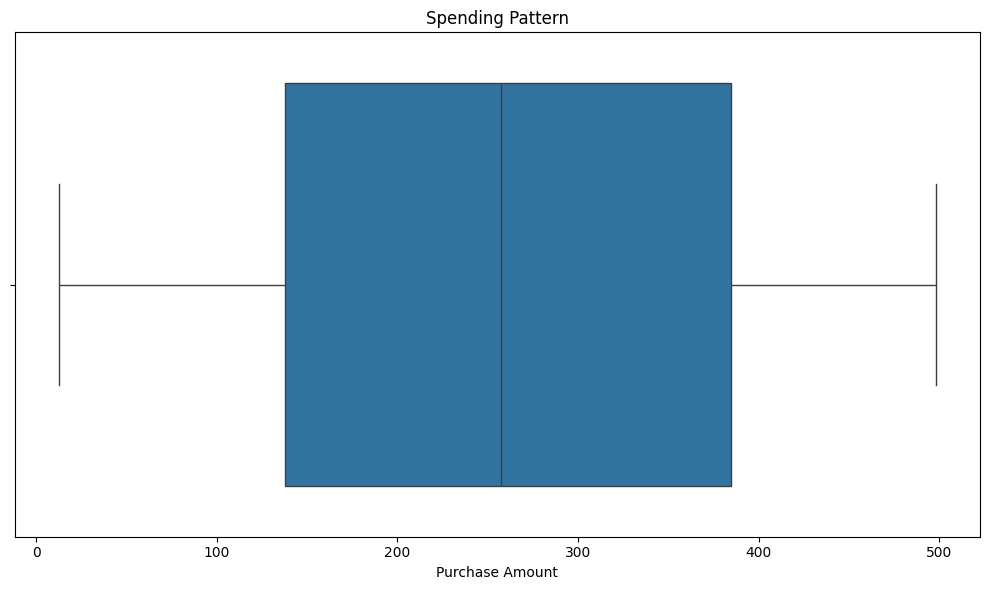

In [40]:
# e. Spending Pattern (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Purchase_Amount'])
plt.title('Spending Pattern')
plt.xlabel('Purchase Amount')
plt.tight_layout()
plt.show()


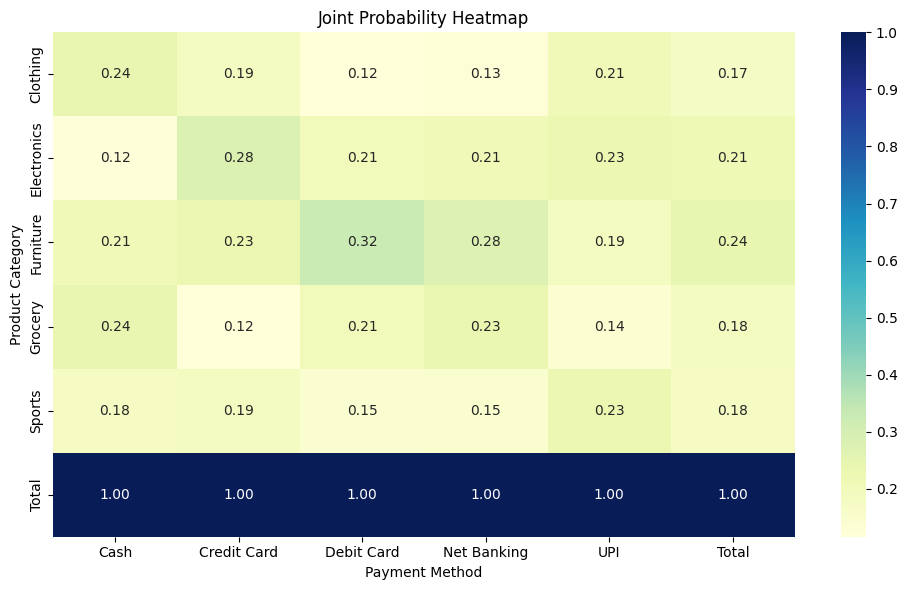

In [41]:

# f. Joint Probability Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(joint_probability_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Joint Probability Heatmap')
plt.xlabel('Payment Method')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


In [43]:
# Observations from the trend

# 1. The monthly sales trend shows fluctuations in total purchase amounts, indicating seasonal buying patterns.
# 2. The grocery category has a significant share of total purchases, suggesting it is a popular choice among customers.
# 3. The pie chart indicates the revenue distribution among different product categories, highlighting the most profitable categories.
# 4. The stacked bar chart reveals trends in payment methods used by customers.
